In [104]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.display import display

from sklearn.metrics import mutual_info_score

**Import the data**

In [105]:
#data is clean but if it weren't we would import data that we cleaned beforehand.
# I'm specifying it this way so others copying parts of the project for their own project have a streamlined process
#df = pd.read_csv("cleaned_fetal_health.csv")

df = pd.read_csv("../fetal_health.csv")

In [106]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [121]:
for column in df.columns:
    print(f"Value counts for column '{column}':")
    display(df[column].value_counts())
    print("\n")  # Add spacing between columns

Value counts for column 'baseline value':


baseline value
133.0    136
130.0    111
122.0    109
138.0    103
125.0     91
128.0     85
120.0     78
142.0     77
144.0     77
132.0     76
136.0     72
140.0     70
134.0     67
135.0     65
146.0     62
127.0     60
137.0     59
129.0     57
131.0     56
143.0     56
123.0     56
148.0     52
121.0     44
139.0     39
141.0     39
126.0     38
145.0     37
115.0     28
150.0     26
110.0     21
149.0     18
119.0     17
152.0     17
112.0     16
147.0     14
151.0     14
159.0     12
114.0     11
158.0     10
124.0     10
118.0      9
154.0      8
106.0      7
116.0      5
157.0      4
156.0      4
117.0      2
160.0      1
Name: count, dtype: int64



Value counts for column 'accelerations':


accelerations
0.000    894
0.003    161
0.002    160
0.001    143
0.004    117
0.006    112
0.005    110
0.008    103
0.007     91
0.009     60
0.010     50
0.011     36
0.012     24
0.013     22
0.014     20
0.015      9
0.016      7
0.017      4
0.018      2
0.019      1
Name: count, dtype: int64



Value counts for column 'fetal_movement':


fetal_movement
0.000    1311
0.001     164
0.002     112
0.003      88
0.004      49
         ... 
0.079       1
0.109       1
0.103       1
0.031       1
0.099       1
Name: count, Length: 102, dtype: int64



Value counts for column 'uterine_contractions':


uterine_contractions
0.000    332
0.005    290
0.004    244
0.006    231
0.007    216
0.003    212
0.008    160
0.002    160
0.001    118
0.009     82
0.010     49
0.011     16
0.012     11
0.013      2
0.014      2
0.015      1
Name: count, dtype: int64



Value counts for column 'light_decelerations':


light_decelerations
0.000    1231
0.001     163
0.003     118
0.002     115
0.004     114
0.005     107
0.006      74
0.008      55
0.007      54
0.009      37
0.010      15
0.011      13
0.012      12
0.013       8
0.014       7
0.015       3
Name: count, dtype: int64



Value counts for column 'severe_decelerations':


severe_decelerations
0.000    2119
0.001       7
Name: count, dtype: int64



Value counts for column 'prolongued_decelerations':


prolongued_decelerations
0.000    1948
0.002      72
0.001      70
0.003      24
0.004       9
0.005       3
Name: count, dtype: int64



Value counts for column 'abnormal_short_term_variability':


abnormal_short_term_variability
60.0    62
58.0    61
65.0    60
63.0    58
64.0    58
        ..
14.0     4
86.0     4
12.0     2
82.0     2
87.0     1
Name: count, Length: 75, dtype: int64



Value counts for column 'mean_value_of_short_term_variability':


mean_value_of_short_term_variability
0.8    125
1.3    121
0.5    121
0.4    120
0.7    117
0.9    114
0.6    113
1.2    107
1.5    100
1.0     99
1.1     97
1.4     95
0.3     84
1.7     78
1.6     76
1.9     62
1.8     51
0.2     47
2.2     47
2.1     44
2.0     38
2.3     27
2.4     27
2.5     26
2.7     25
2.8     22
2.6     21
3.0     16
2.9     13
3.2     13
3.4     12
3.1     10
3.3      7
3.8      6
3.6      4
3.5      3
4.9      3
3.7      3
4.1      3
4.2      3
5.0      2
3.9      2
6.3      2
4.0      2
4.4      2
4.5      2
5.4      2
4.3      2
4.8      2
7.0      1
5.3      1
4.7      1
6.0      1
5.7      1
5.2      1
5.9      1
6.9      1
Name: count, dtype: int64



Value counts for column 'percentage_of_time_with_abnormal_long_term_variability':


percentage_of_time_with_abnormal_long_term_variability
0.0     1240
1.0       52
2.0       45
5.0       43
4.0       40
        ... 
85.0       1
79.0       1
86.0       1
88.0       1
63.0       1
Name: count, Length: 87, dtype: int64



Value counts for column 'mean_value_of_long_term_variability':


mean_value_of_long_term_variability
0.0     137
7.1      29
6.7      29
6.5      25
5.2      25
       ... 
24.1      1
17.5      1
22.5      1
27.0      1
0.8       1
Name: count, Length: 249, dtype: int64



Value counts for column 'histogram_width':


histogram_width
39.0     42
102.0    35
27.0     30
31.0     29
90.0     28
         ..
6.0       1
162.0     1
131.0     1
146.0     1
180.0     1
Name: count, Length: 154, dtype: int64



Value counts for column 'histogram_min':


histogram_min
50.0     77
52.0     50
71.0     49
120.0    48
60.0     45
         ..
155.0     2
149.0     2
158.0     1
159.0     1
156.0     1
Name: count, Length: 109, dtype: int64



Value counts for column 'histogram_max':


histogram_max
157.0    71
171.0    66
158.0    62
156.0    60
159.0    58
         ..
123.0     2
122.0     2
134.0     2
213.0     1
205.0     1
Name: count, Length: 86, dtype: int64



Value counts for column 'histogram_number_of_peaks':


histogram_number_of_peaks
1.0     357
2.0     331
3.0     269
4.0     258
5.0     210
6.0     158
7.0     145
0.0     107
8.0     106
9.0      67
10.0     49
11.0     28
12.0     22
13.0     10
14.0      5
16.0      2
15.0      1
18.0      1
Name: count, dtype: int64



Value counts for column 'histogram_number_of_zeroes':


histogram_number_of_zeroes
0.0     1624
1.0      366
2.0      108
3.0       21
4.0        2
5.0        2
10.0       1
8.0        1
7.0        1
Name: count, dtype: int64



Value counts for column 'histogram_mode':


histogram_mode
133.0    140
136.0     89
150.0     89
142.0     87
148.0     79
        ... 
97.0       1
187.0      1
76.0       1
71.0       1
69.0       1
Name: count, Length: 88, dtype: int64



Value counts for column 'histogram_mean':


histogram_mean
143.0    65
144.0    64
135.0    63
141.0    61
140.0    60
         ..
178.0     1
169.0     1
165.0     1
168.0     1
73.0      1
Name: count, Length: 103, dtype: int64



Value counts for column 'histogram_median':


histogram_median
146.0    69
137.0    68
142.0    68
145.0    67
147.0    65
         ..
178.0     1
186.0     1
183.0     1
180.0     1
104.0     1
Name: count, Length: 95, dtype: int64



Value counts for column 'histogram_variance':


histogram_variance
1.0      248
0.0      187
2.0      166
3.0      161
4.0      108
        ... 
127.0      1
126.0      1
134.0      1
144.0      1
147.0      1
Name: count, Length: 133, dtype: int64



Value counts for column 'histogram_tendency':


histogram_tendency
 0.0    1115
 1.0     846
-1.0     165
Name: count, dtype: int64



Value counts for column 'fetal_health':


fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

In [108]:
fetal_health_values = {
    1: 'normal',
    2: 'suspect',
    0: 'pathological'
}

# Create a copy of the original DataFrame
temporary_df = df.copy()

# Map the 'fetal_health' values and assign to a new column 'status'
temporary_df['fetal_health_str'] = temporary_df['fetal_health'].map(fetal_health_values)

# Display the temporary DataFrame
del temporary_df['fetal_health']
temporary_df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health_str
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,suspect
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,normal
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,normal
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,normal
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,suspect
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,suspect
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,suspect
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,suspect


In [109]:
temporary_df.tail()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health_str
2121,140.0,0.000,0.000,0.007,0.0,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,suspect
2122,140.0,0.001,0.000,0.007,0.0,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,suspect
2123,140.0,0.001,0.000,0.007,0.0,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,suspect
2124,140.0,0.001,0.000,0.006,0.0,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,suspect
2125,142.0,0.002,0.002,0.008,0.0,0.0,0.0,74.0,0.4,36.0,...,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,normal


In [110]:
temporary_df.describe().round()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
count,2126.0,2126.0,2126.0,2126.0,2126.0,2126.0,2126.0,2126.0,2126.0,2126.0,...,2126.0,2126.0,2126.0,2126.0,2126.0,2126.0,2126.0,2126.0,2126.0,2126.0
mean,133.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,1.0,10.0,...,70.0,94.0,164.0,4.0,0.0,137.0,135.0,138.0,19.0,0.0
std,10.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,1.0,18.0,...,39.0,30.0,18.0,3.0,1.0,16.0,16.0,14.0,29.0,1.0
min,106.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,...,3.0,50.0,122.0,0.0,0.0,60.0,73.0,77.0,0.0,-1.0
25%,126.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,1.0,0.0,...,37.0,67.0,152.0,2.0,0.0,129.0,125.0,129.0,2.0,0.0
50%,133.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,1.0,0.0,...,68.0,93.0,162.0,3.0,0.0,139.0,136.0,139.0,7.0,0.0
75%,140.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0,2.0,11.0,...,100.0,120.0,174.0,6.0,0.0,148.0,145.0,148.0,24.0,1.0
max,160.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,7.0,91.0,...,180.0,159.0,238.0,18.0,10.0,187.0,182.0,186.0,269.0,1.0


In [111]:
temporary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [112]:
correlation_matrix = df.corr()
correlation_matrix

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


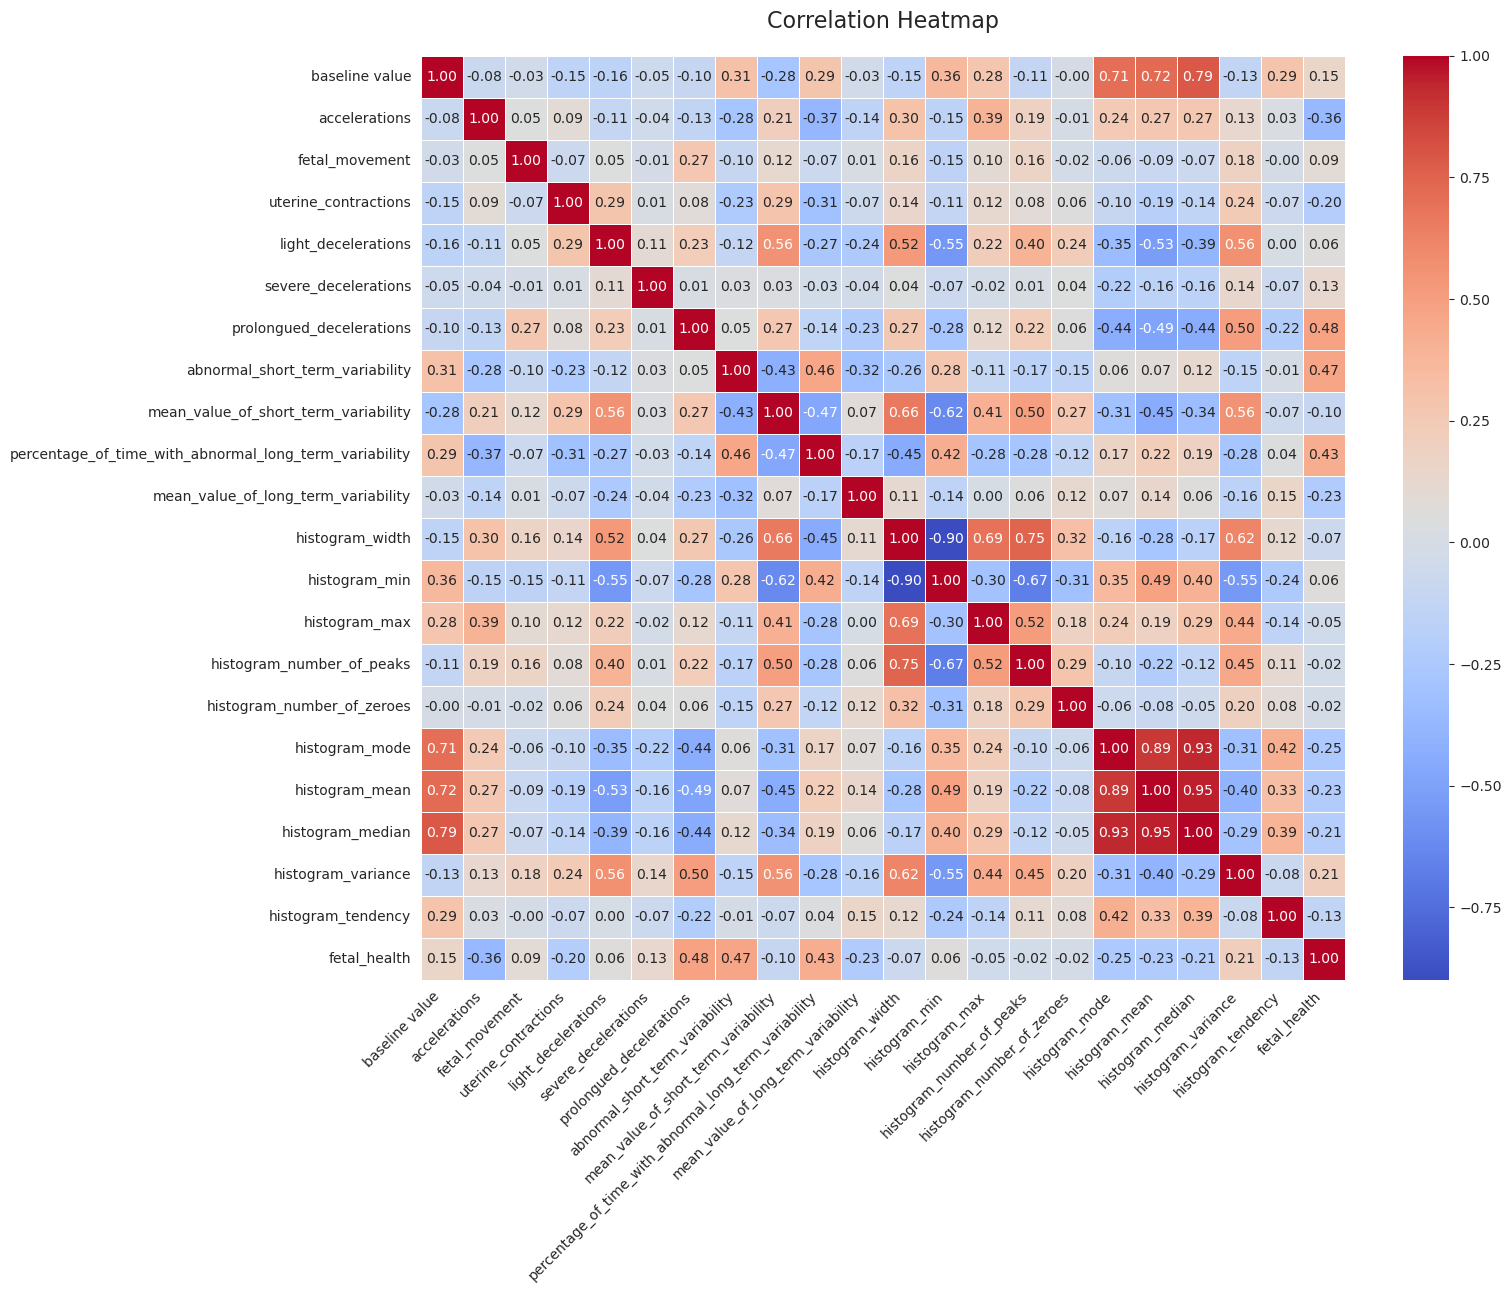

In [113]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Adjust figure size to make each square larger
plt.figure(figsize=(15, 12))

sns.heatmap(
    correlation_matrix, 
    annot=True,       
    fmt='.2f',        
    cmap='coolwarm',  
    square=True,      
    linewidths=0.575,  
)

plt.title("Correlation Heatmap", fontsize=16, pad=20)
plt.xticks(fontsize=10, rotation=45, ha="right")  
plt.yticks(fontsize=10, rotation=0)  

plt.show()

In [114]:
df.nunique()

baseline value                                             48
accelerations                                              20
fetal_movement                                            102
uterine_contractions                                       16
light_decelerations                                        16
severe_decelerations                                        2
prolongued_decelerations                                    6
abnormal_short_term_variability                            75
mean_value_of_short_term_variability                       57
percentage_of_time_with_abnormal_long_term_variability     87
mean_value_of_long_term_variability                       249
histogram_width                                           154
histogram_min                                             109
histogram_max                                              86
histogram_number_of_peaks                                  18
histogram_number_of_zeroes                                  9
histogra

In [115]:
short_values = ['severe_decelerations',
                'light_decelerations',
                'prolongued_decelerations', 
                'histogram_number_of_zeroes', 
                'histogram_tendency', 
                'fetal_health'
               ]

# Use `value_counts` for each column and display the results
for col in short_values:
    print(f"Value counts for '{col}':")
    print(df[col].value_counts())
    print()

Value counts for 'severe_decelerations':
severe_decelerations
0.000    2119
0.001       7
Name: count, dtype: int64

Value counts for 'light_decelerations':
light_decelerations
0.000    1231
0.001     163
0.003     118
0.002     115
0.004     114
0.005     107
0.006      74
0.008      55
0.007      54
0.009      37
0.010      15
0.011      13
0.012      12
0.013       8
0.014       7
0.015       3
Name: count, dtype: int64

Value counts for 'prolongued_decelerations':
prolongued_decelerations
0.000    1948
0.002      72
0.001      70
0.003      24
0.004       9
0.005       3
Name: count, dtype: int64

Value counts for 'histogram_number_of_zeroes':
histogram_number_of_zeroes
0.0     1624
1.0      366
2.0      108
3.0       21
4.0        2
5.0        2
10.0       1
8.0        1
7.0        1
Name: count, dtype: int64

Value counts for 'histogram_tendency':
histogram_tendency
 0.0    1115
 1.0     846
-1.0     165
Name: count, dtype: int64

Value counts for 'fetal_health':
fetal_health
1.0

**Visualization**

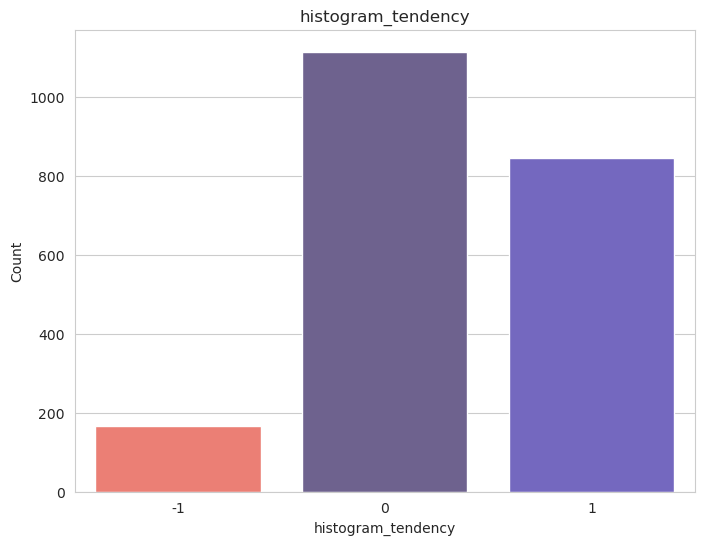

In [116]:
# Set up the plot size and style
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Create the count plot with 'hue' assigned to 'x' and remove the legend
sns.countplot(x='histogram_tendency', data=df, hue='histogram_tendency', palette=['#FF6F61', '#6B5B95', '#6A5ACD'], legend=False)

# Customize plot labels and legend
plt.xlabel("histogram_tendency")
plt.ylabel("Count")
plt.title("histogram_tendency")

# Renaming x-ticks for clarity
plt.xticks([0, 1, 2], ['-1', '0', '1'])  # Renaming x-ticks for clarity

# Show the plot
plt.show()

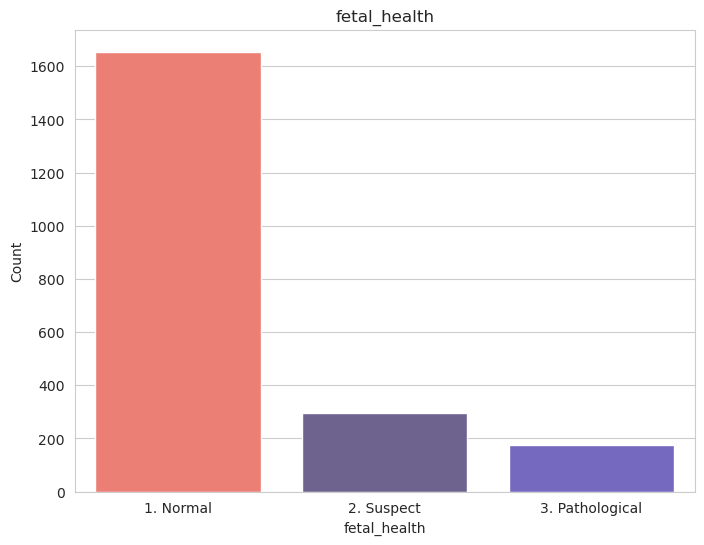

In [117]:
# Set up the plot size and style
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Create the count plot with 'hue' assigned to 'x' and remove the legend
sns.countplot(x='fetal_health', data=df, hue='fetal_health', palette=['#FF6F61', '#6B5B95', '#6A5ACD'], legend=False)

# Customize plot labels and legend
plt.xlabel("fetal_health")
plt.ylabel("Count")
plt.title("fetal_health")

# Renaming x-ticks for clarity
plt.xticks([0, 1, 2], ['1. Normal', '2. Suspect', '3. Pathological'])  # Renaming x-ticks for clarity

# Show the plot
plt.show()

↑ <br>
Yay! Most babies are healthy. :- )

#### Disclaimer

**To paraphrase an acquaintance. <br>
I'm not even a general practitioner let alone OB/GYN so I had to use a little bit of help. <br>
Please take everything you see in the next few cells with a fair amount of grain of salt.**

In [118]:
#values for targeted fetures
#severe_decelerations 0, 1
#histogram_tendency 0, 1, -1
#fetal_health 1, 2, 3

Severe decelerations refer to significant and potentially dangerous drops in <br>
fetal heart rate, which can indicate fetal distress <br>
and may require medical intervention. <br>

Histogram tendency with values 0, 1, and -1 likely refers to a categorization <br>
of the trend or distribution of a certain fetal health measurement <br>
(e.g., fetal heart rate) over time, with: <br>

0 being stable, <br>
1 being an upward trend, <br>
-1 being a downward trend.


**NB. <br>
This one was a doozy to debug. <br>
Turns out the data was float not to specify that something is 0 or 1 to <br>
signify an occurence but a number of heart deacelerations in a second. <br>
Since it is a significant outlier in predicting fetus health it will taint <br>
the data with its occurence but as it is such an important variable <br>
it is a relatively good predictor for feature importance**

In [119]:
print(df['severe_decelerations'].value_counts())

severe_decelerations
0.000    2119
0.001       7
Name: count, dtype: int64


**Even though it is displayed that ```no_severe_decelerations``` impacts the target ```fetal_health```, that is probably <br>
because a fetus can have a temporary episode but be healthy overall. <br>
Since ```yes_severe_decelerations``` correlates with ```fetal_health``` 3 value <br>
except one case it is a relatively good predictor and thus explains the high score.**


In [122]:
# Convert severe_decelerations to integer for filtering purposes and calculate the means
no_severe_decelerations = df[df.severe_decelerations == 0.000].fetal_health.mean()
yes_severe_decelerations = df[df.severe_decelerations == 0.001].fetal_health.mean()

display(no_severe_decelerations)
display(yes_severe_decelerations)

1.2996696554978764

2.7142857142857144

In [132]:
# Convert severe_decelerations to integer for filtering purposes and calculate the means
no_severe_decelerations = df[df.severe_decelerations == 0.000]
yes_severe_decelerations = df[df.severe_decelerations == 0.001]

print("No severe decelerations")
display(no_severe_decelerations[['light_decelerations', 'severe_decelerations', 'fetal_health']])
print()
print("With severe decelerations")
display(yes_severe_decelerations[['light_decelerations', 'severe_decelerations', 'fetal_health']])

No severe decelerations


,light_decelerations,severe_decelerations,fetal_health
0,0.000,0.0,2.0
1,0.003,0.0,1.0
2,0.003,0.0,1.0
3,0.003,0.0,1.0
4,0.000,0.0,1.0
...,...,...,...
2121,0.000,0.0,2.0
2122,0.000,0.0,2.0
2123,0.000,0.0,2.0
2124,0.000,0.0,2.0



With severe decelerations


,light_decelerations,severe_decelerations,fetal_health
1488,0.000,0.001,1.0
1489,0.000,0.001,3.0
1791,0.010,0.001,3.0
1792,0.011,0.001,3.0
1793,0.012,0.001,3.0
1794,0.010,0.001,3.0
1795,0.009,0.001,3.0


**```histogram_tendency``` feature <br>**

In [135]:
# Convert severe_decelerations to integer for filtering purposes and calculate the means
histogram_tendency_zero = df[df.histogram_tendency == 0].fetal_health.mean()
histogram_tendency_one = df[df.histogram_tendency == 1].fetal_health.mean()
histogram_tendency_minus_one = df[df.histogram_tendency == -1].fetal_health.mean()

display(histogram_tendency_zero)
display(histogram_tendency_one)
display(histogram_tendency_minus_one)

1.2860986547085203

1.2541371158392436

1.6848484848484848

In [136]:
histogram_tendency_zero = df[df.histogram_tendency == 0]
histogram_tendency_one = df[df.histogram_tendency == 1]
histogram_tendency_minus_one = df[df.histogram_tendency == -1]

print("histogram_tendency_zero")
display(histogram_tendency_zero[['histogram_tendency', 'light_decelerations', 'severe_decelerations', 'fetal_health']])
print()
print("histogram_tendency_one")
display(histogram_tendency_one[['histogram_tendency', 'light_decelerations', 'severe_decelerations', 'fetal_health']])
print()
print("histogram_tendency_minus_one")
display(histogram_tendency_minus_one[['histogram_tendency', 'light_decelerations', 'severe_decelerations', 'fetal_health']])

histogram_tendency_zero


,histogram_tendency,light_decelerations,severe_decelerations,fetal_health
1,0.0,0.003,0.0,1.0
2,0.0,0.003,0.0,1.0
5,0.0,0.009,0.0,3.0
6,0.0,0.008,0.0,3.0
14,0.0,0.005,0.0,1.0
...,...,...,...,...
2115,0.0,0.000,0.0,1.0
2116,0.0,0.000,0.0,1.0
2120,0.0,0.001,0.0,1.0
2121,0.0,0.000,0.0,2.0



histogram_tendency_one


,histogram_tendency,light_decelerations,severe_decelerations,fetal_health
0,1.0,0.000,0.0,2.0
3,1.0,0.003,0.0,1.0
4,1.0,0.000,0.0,1.0
7,1.0,0.000,0.0,3.0
8,1.0,0.000,0.0,3.0
...,...,...,...,...
2118,1.0,0.001,0.0,1.0
2119,1.0,0.001,0.0,1.0
2122,1.0,0.000,0.0,2.0
2123,1.0,0.000,0.0,2.0



histogram_tendency_minus_one


,histogram_tendency,light_decelerations,severe_decelerations,fetal_health
22,-1.0,0.003,0.0,3.0
26,-1.0,0.000,0.0,3.0
99,-1.0,0.000,0.0,1.0
153,-1.0,0.000,0.0,1.0
154,-1.0,0.000,0.0,1.0
...,...,...,...,...
2084,-1.0,0.000,0.0,1.0
2085,-1.0,0.000,0.0,1.0
2087,-1.0,0.000,0.0,1.0
2089,-1.0,0.000,0.0,1.0


**Risk rate**

In [140]:
values = ['histogram_tendency', 'severe_decelerations', 'light_decelerations']
global_mean = df.fetal_health.mean()

for val in values:
    df_group = df.groupby(by=val).fetal_health.agg(['mean'])   
    df_group['diff'] = df_group['mean'] - global_mean      
    df_group['risk'] = df_group['mean'] / global_mean
    
    display(df_group)

,mean,diff,risk
histogram_tendency,,,
-1.0,1.684848,0.380521,1.291737
0.0,1.286099,-0.018229,0.986024
1.0,1.254137,-0.050190,0.961520


,mean,diff,risk
severe_decelerations,,,
0.000,1.299670,-0.004658,0.996429
0.001,2.714286,1.409958,2.080985


,mean,diff,risk
light_decelerations,,,
0.000,1.308692,0.004365,1.003346
0.001,1.226994,-0.077334,0.940710
0.002,1.295652,-0.008675,0.993349
0.003,1.364407,0.060079,1.046062
0.004,1.149123,-0.155205,0.881008
0.005,1.186916,-0.117411,0.909983
0.006,1.310811,0.006483,1.004971
0.007,1.259259,-0.045068,0.965447
0.008,1.327273,0.022945,1.017592


**Mutual information <br>
Mutual information is the amount of information a variable is providing about another variable. <br>
Not surprising severe_decelerations is at the bottom as it only has 7 rows that are higher than 0.**

In [143]:
import warnings

# Suppress specific warning
warnings.filterwarnings("ignore", category=UserWarning)

# Exclude the target 'fetal_health'
masked_df = df.drop(columns='fetal_health')

def calculate_mi(series):        
    return mutual_info_score(series, df.fetal_health)
    
df_mi = masked_df.apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')   
df_mi

,MI
mean_value_of_short_term_variability,0.235256
percentage_of_time_with_abnormal_long_term_variability,0.221345
abnormal_short_term_variability,0.218479
histogram_width,0.205684
histogram_mean,0.203798
histogram_variance,0.196882
histogram_mode,0.188358
histogram_min,0.184556
histogram_median,0.174103
mean_value_of_long_term_variability,0.165804
